<img align="left" width="250" height="70" src="https://gsb.skku.edu/_res/en/img/common/logo_eng.png"> <br><br><br>


# **Individual Assignment 4: Data Merging** (4 Marks)

**Programming for Analytics by Yuan Tian**

---

**Objective**:

* More practice with Pandas
    * data cleaning
    * data aggregation
    * `df.reset_index()`
    * `df.rename()`
* Combining and merging datasets

**Reference**

W. McKinney, [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython](https://wesmckinney.com/book/), 3 edition. O’Reilly Media, 2022
* **Chapter 8**: [Data Wrangling: Join, Combine, and Reshape](https://wesmckinney.com/book/data-wrangling.html)

---

**Copy to Drive**

<font color="red">Make sure you **make a copy of the instructor's notebook** before you work on it.
Otherwise, your work won't be saved.</font>  

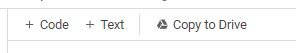

## **Submission Guideline**


**You need to upload your Colab Notebook on Canvas for this assignment.**

* Once you are done with the assignment in Colab, choose **File -> Download -> Download .ipynb**.
* Then upload your downloaded `.ipynb` notebook on Canvas for Assignment 4.

**Late assignment submission will receive a 15% penalty.**

# <font color="green">Q0.Add a text cell below with your name in it</font>

## Sujin Kim

## package Imports

We will make use of the `matplotlib` package for some visualization in this assignments.

In [ ]:
import numpy as np
import pandas as pd

# 1.Customers Who Never Order (merging) (1 mark)

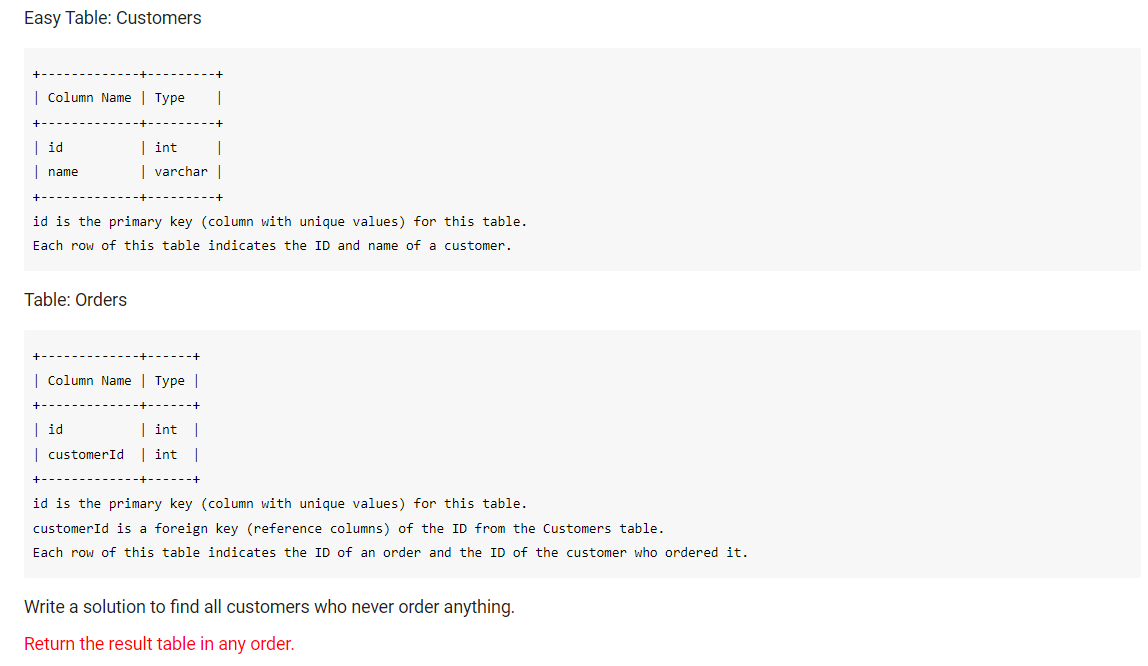

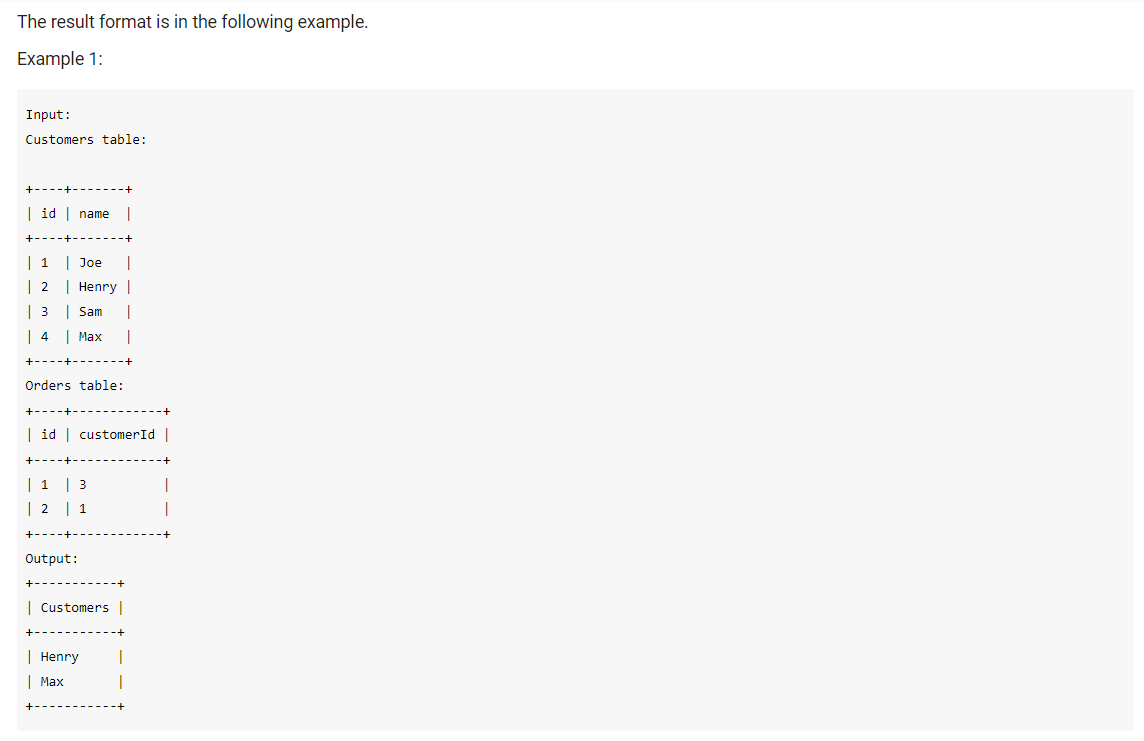

In [ ]:
#data
data = [[1, 'Joe'], [2, 'Henry'], [3, 'Sam'], [4, 'Max']]
Customers = pd.DataFrame(data, columns=['id', 'name']).astype({'id':'Int64', 'name':'object'})
data = [[1, 3], [2, 1]]
Orders = pd.DataFrame(data, columns=['id', 'customerId']).astype({'id':'Int64', 'customerId':'Int64'})

In [ ]:
Customers.info()
Orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4 non-null      Int64 
 1   name    4 non-null      object
dtypes: Int64(1), object(1)
memory usage: 196.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          2 non-null      Int64
 1   customerId  2 non-null      Int64
dtypes: Int64(2)
memory usage: 164.0 bytes


 <font color="blue">Results must be dataframes, and results must match with the output table in the question (e.g., including values and column names).

### **Q1.Solution**

In [ ]:
# your turn
# the result must be a dataframe, the result must match the output in the question (e.g., column names must be matched).
# If you get a Series, you can use series.to_frame() to convert it to a dataframe.
# Hint 1: pd.merge(), filtering, df.rename()

mrgdf = pd.merge(Customers, Orders,
                 how='left',
                 left_on='id',
                 right_on='customerId',
                 validate='1:m')

#rename columns name
mrgdf2 = mrgdf.rename(columns = {'id_x':'customerId', 'id_y':'OrderId', 'customerId':'OderCusID'})

#Filter and slicing
Customer_Order = mrgdf2[mrgdf2['OrderId'].isnull()].iloc[:,0:2]
Customer_Order


,customerId,name
1,2,Henry
3,4,Max


# 2.Delete Duplicate Emails (0.5 mark)

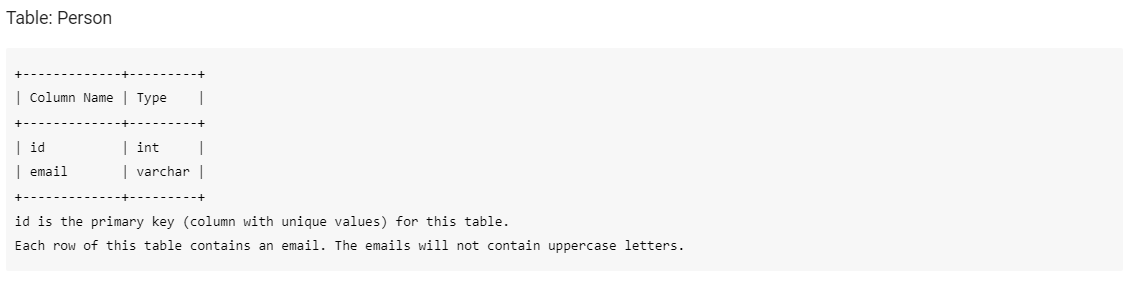

Write a solution to delete all duplicate emails, keeping only one unique email with the smallest id.

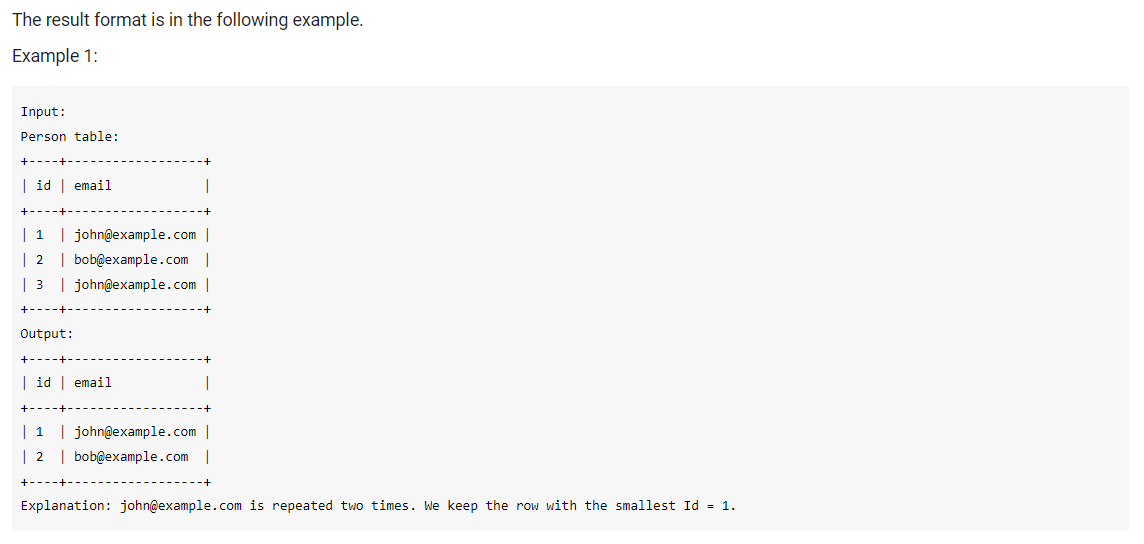

In [ ]:
#data
data = [[1, 'john@example.com'], [2, 'bob@example.com'], [3, 'john@example.com']]
Person = pd.DataFrame(data, columns=['id', 'email']).astype({'id':'int64', 'email':'object'})

 <font color="blue">Results must be dataframes, and results must match with the output table in the question (e.g., including values and column names).

### **Q2. Solution**

In [ ]:
# your turn
# Hint: df.drop_duplicates(subset = , keep = "first")
# make sure that you understand the "subset" argument in the drop_duplicaes() function, you may need to use API reference, textbook or online materials.
# The result must be a dataframe with the same data and column names as the one in the "Output" (you can ignore the index of the dataframe).

Person.drop_duplicates(subset='email', keep='first')

#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates

,id,email
0,1,john@example.com
1,2,bob@example.com


# 3.Find Total Time Spent by Each Employee (0.5 mark)

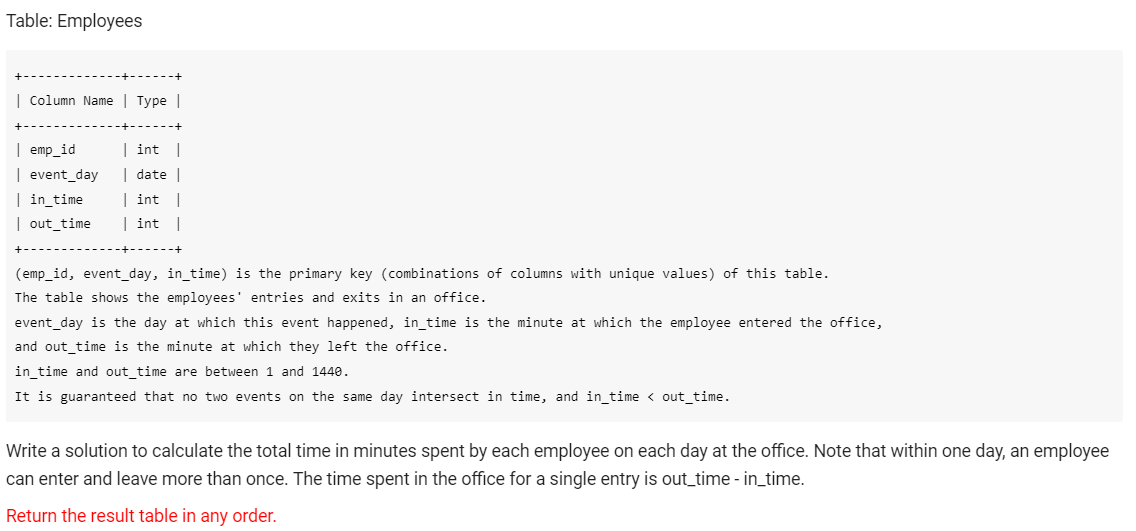

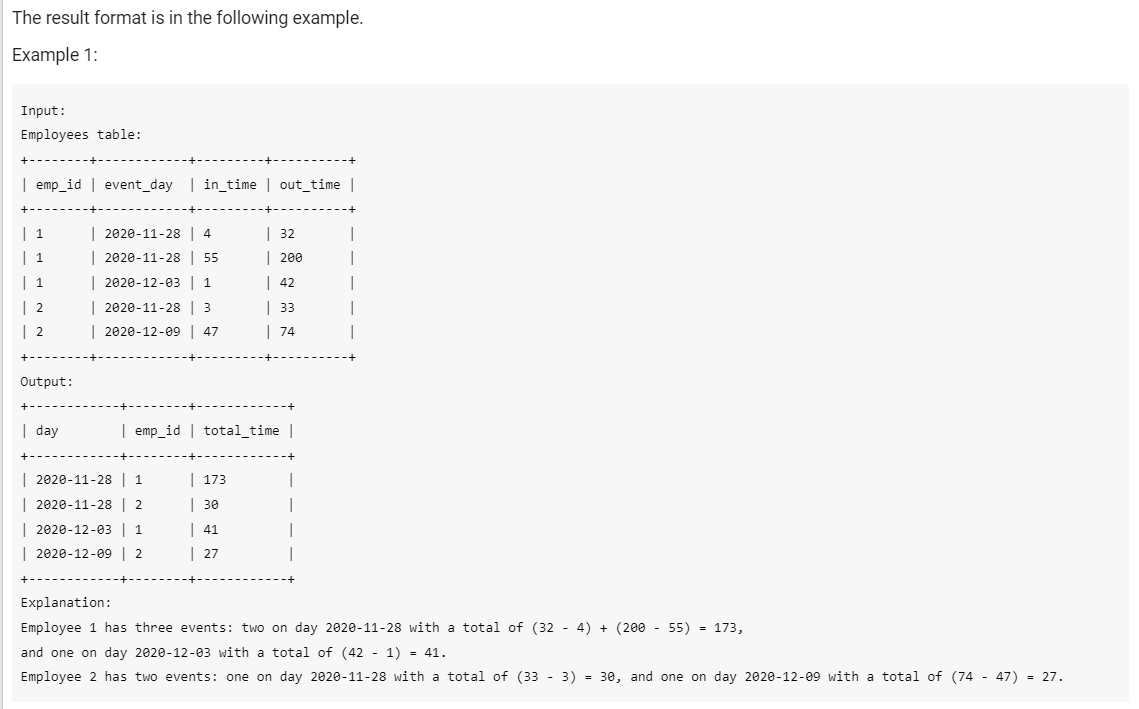

In [ ]:
#data
data = [['1', '2020-11-28', '4', '32'], ['1', '2020-11-28', '55', '200'], ['1', '2020-12-3', '1', '42'], ['2', '2020-11-28', '3', '33'], ['2', '2020-12-9', '47', '74']]
Employees = pd.DataFrame(data, columns=['emp_id', 'event_day', 'in_time', 'out_time']).astype({'emp_id':'Int64', 'event_day':'datetime64[ns]', 'in_time':'Int64', 'out_time':'Int64'})

 <font color="blue">Results must be dataframes, and results must match with the output table in the question (e.g., including values and column names).

### **Q3. Solution**

In [ ]:
# Your turn
# result must be a dataframe that matches with the output table.

#Add a new colunm with the Total event time
Employees['total_time'] = Employees['out_time'] - Employees['in_time']

#Sum total time by date and ID (multi-index is very usefull!!)
res = Employees.groupby(by=['event_day','emp_id'])['total_time'].sum()

#reset index from multi-index series
Total_Time_emplyee = res.reset_index()

#change the 'day' column name
Total_Time_emplyee.rename(columns={'event_day':'day'})

,day,emp_id,total_time
0,2020-11-28,1,173
1,2020-11-28,2,30
2,2020-12-03,1,41
3,2020-12-09,2,27


# 4.Sales Person (merging) (1 mark)

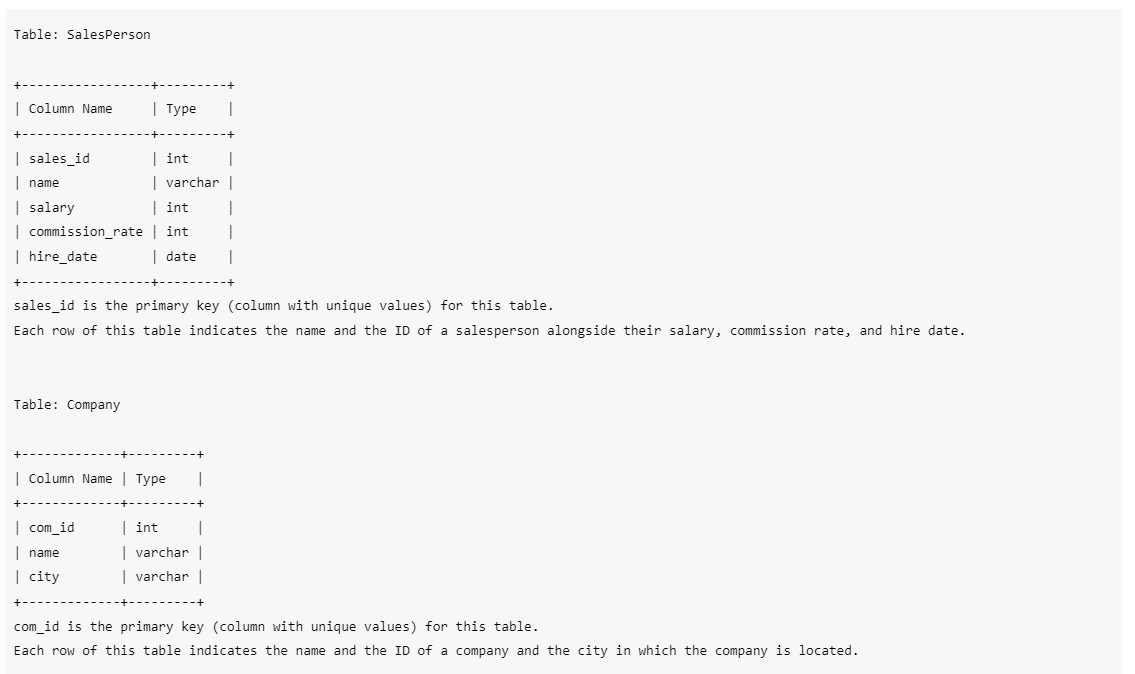

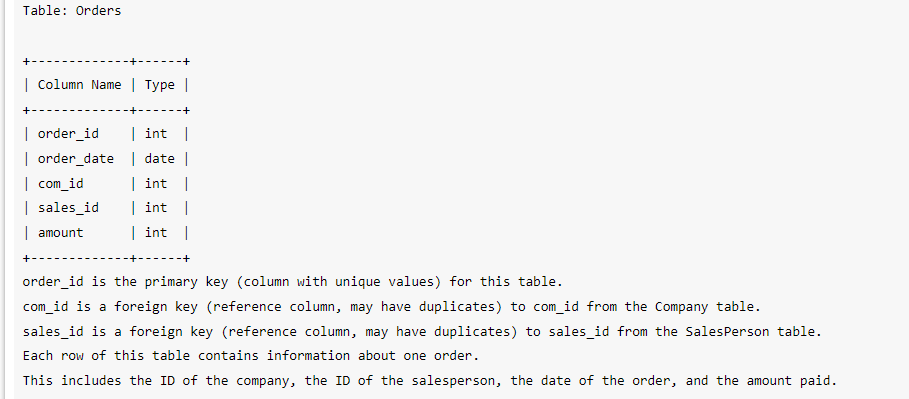

**Write a solution to find the names of all the salespersons who did not have any orders related to the company with the name "RED"**.

Return the result table in any order.

The result format is in the following example.



Example 1:
```
Input:
SalesPerson table:
+----------+------+--------+-----------------+------------+
| sales_id | name | salary | commission_rate | hire_date  |
+----------+------+--------+-----------------+------------+
| 1        | John | 100000 | 6               | 4/1/2006   |
| 2        | Amy  | 12000  | 5               | 5/1/2010   |
| 3        | Mark | 65000  | 12              | 12/25/2008 |
| 4        | Pam  | 25000  | 25              | 1/1/2005   |
| 5        | Alex | 5000   | 10              | 2/3/2007   |
+----------+------+--------+-----------------+------------+
Company table:
+--------+--------+----------+
| com_id | name   | city     |
+--------+--------+----------+
| 1      | RED    | Boston   |
| 2      | ORANGE | New York |
| 3      | YELLOW | Boston   |
| 4      | GREEN  | Austin   |
+--------+--------+----------+
Orders table:
+----------+------------+--------+----------+--------+
| order_id | order_date | com_id | sales_id | amount |
+----------+------------+--------+----------+--------+
| 1        | 1/1/2014   | 3      | 4        | 10000  |
| 2        | 2/1/2014   | 4      | 5        | 5000   |
| 3        | 3/1/2014   | 1      | 1        | 50000  |
| 4        | 4/1/2014   | 1      | 4        | 25000  |
+----------+------------+--------+----------+--------+
Output:
+------+
| name |
+------+
| Amy  |
| Mark |
| Alex |
+------+
Explanation:
According to orders 3 and 4 in the Orders table,
it is easy to tell that only salesperson John and Pam have sales to company RED,
so we report all the other names in the table salesperson.
```

In [ ]:
#data
data = [[1, 'John', 100000, 6, '4/1/2006'], [2, 'Amy', 12000, 5, '5/1/2010'], [3, 'Mark', 65000, 12, '12/25/2008'], [4, 'Pam', 25000, 25, '1/1/2005'], [5, 'Alex', 5000, 10, '2/3/2007']]
SalesPerson = pd.DataFrame(data, columns=['sales_id', 'name', 'salary', 'commission_rate', 'hire_date']).astype({'sales_id':'Int64', 'name':'object', 'salary':'Int64', 'commission_rate':'Int64', 'hire_date':'datetime64[ns]'})
data = [[1, 'RED', 'Boston'], [2, 'ORANGE', 'New York'], [3, 'YELLOW', 'Boston'], [4, 'GREEN', 'Austin']]
Company = pd.DataFrame(data, columns=['com_id', 'name', 'city']).astype({'com_id':'Int64', 'name':'object', 'city':'object'})
data = [[1, '1/1/2014', 3, 4, 10000], [2, '2/1/2014', 4, 5, 5000], [3, '3/1/2014', 1, 1, 50000], [4, '4/1/2014', 1, 4, 25000]]
Orders = pd.DataFrame(data, columns=['order_id', 'order_date', 'com_id', 'sales_id', 'amount']).astype({'order_id':'Int64', 'order_date':'datetime64[ns]', 'com_id':'Int64', 'sales_id':'Int64', 'amount':'Int64'})

 <font color="blue">Results must be dataframes, and results must match with the output table in the question (e.g., including values and column names).

### **Q4. Solution**

In [ ]:
# your turn:
# Hint 1: merge() 2 tables, chooose the right type of join.
# the result table must be a dataframe that matches with the output.

#Merge Order and Company first then merge it into SalesPerson.
Order_CP = Orders.merge(Company, on='com_id', suffixes=('','_CP'), how='left', validate='m:1')
SP_Order_CP = SalesPerson.merge(Order_CP, on='sales_id', suffixes=('','_CP'), how='left', validate='1:m')

#check sales person's name has "RED" at least once
sales_with_RED = SP_Order_CP[SP_Order_CP['name_CP'] == 'RED']['name']

#Filter sales names those are not in 'sales_with_RED'
sales_no_RED = SP_Order_CP[~SP_Order_CP['name'].isin(sales_with_RED)][['name']] #"~"means 'False'
sales_no_RED
#sales_with_RED

,name
1,Amy
2,Mark
5,Alex


# 5.Actors and Directors Who Cooperated At Least Three Times (1 mark)

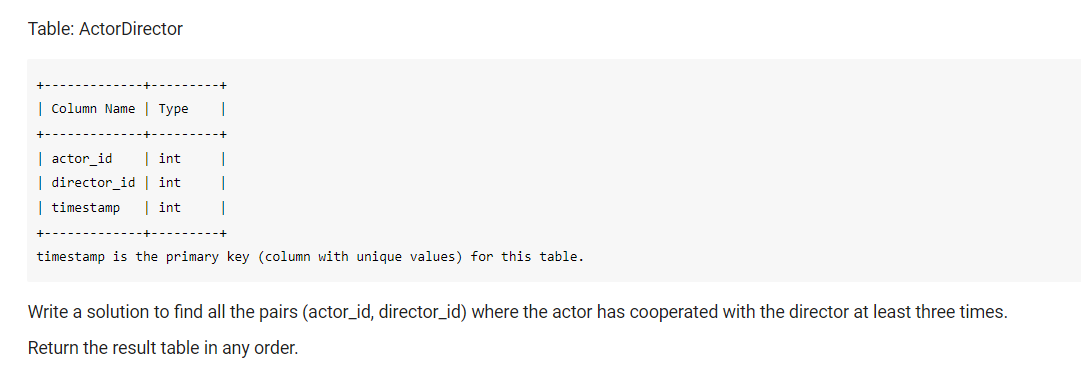

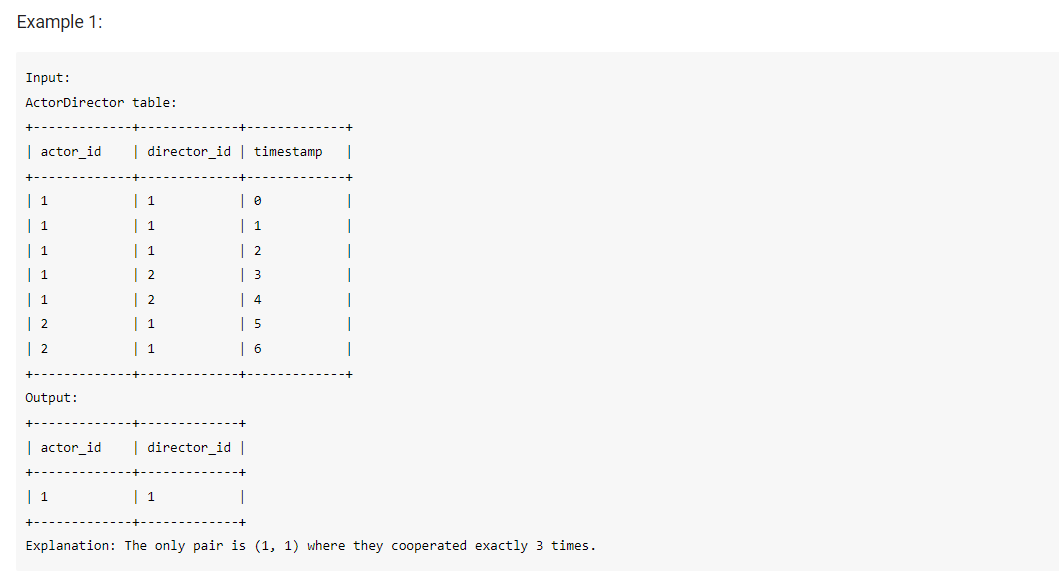

In [ ]:
#data
data = [[1, 1, 0], [1, 1, 1], [1, 1, 2], [1, 2, 3], [1, 2, 4], [2, 1, 5], [2, 1, 6]]
ActorDirector = pd.DataFrame(data, columns=['actor_id', 'director_id', 'timestamp']).astype({'actor_id':'int64', 'director_id':'int64', 'timestamp':'int64'})

 <font color="blue">Results must be dataframes, and results must match with the output table in the question (e.g., including values and column names).

### **Q5. Solution**

In [ ]:
# your turn:
# result must be a dataframe the same as the one in the output.

# make multi-index by 'groupby()
pair_counts = ActorDirector.groupby(['actor_id', 'director_id']).size()

#return indecis to column by reset_index()
pair_result = pair_counts.reset_index(name='count') # 'name=' set column name of the original value

# filter pair_counts > 3
result = pair_result[pair_result['count'] >= 3]

# slice columns
result.iloc[:,0:2]


,actor_id,director_id
0,1,1




Thank you for reading!

< End of Document >